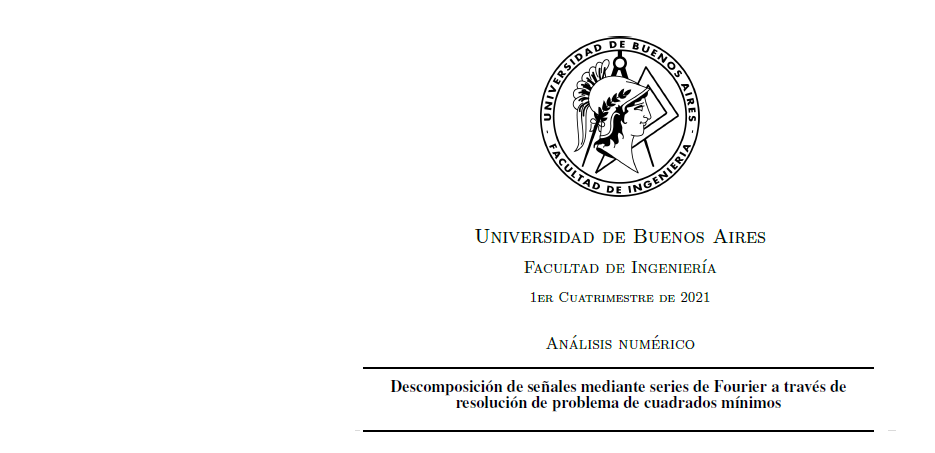

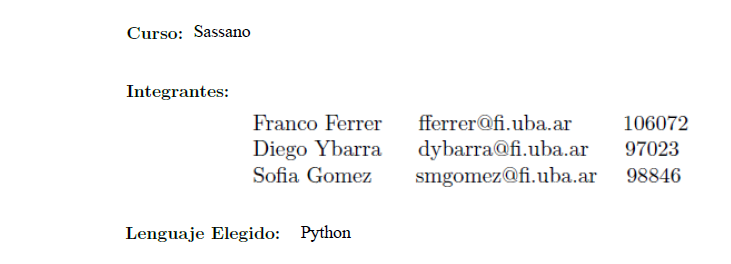

# **Objetivos**


*   Determinar los coeficientes de la serie de Fourier de una señal periódica cuadrada 

*  Utilizar diferentes métodos alternativos para determinar los coeficientes de Fourier y verificar que la función resultante se aproxime efectivamente a la original

*   Comparar los resultados obtenidos por los diferentes métodos vistos en la materia


# **Introducción**

En este documento tratamos diversos métodos para hallar los coeficientes de la serie de Fourier, cómo cambia la aproximación a la función a medida que aumenta la cantidad de coeficientes, los errores de cálculo que pueden surgir, cómo deben ser los parámetros ya sea para poder usar cada método o para resolver el sistema final.  
Iremos enunciando las consignas del trabajo y colocando debajo de cada una de ellas su desarrollo y resolución 

# **Orden de resolución**

1.   Definicion de la función cuadrada
2.   Desarrollo en serie de Fourier
3.   Desarrollo general en cuadrados mínimos
4.   Función de ajuste para CM
5.   Calculo de coeficientes por pivoteo parcial
6.   Gráfica de los resultados de pivoteo parcial
7.   Calculo de coeficientes por Gauss-Seidel
8.   Gráfica de los resultados de G-S
9.   Diferencia de resultados entre métodos
10.  Cálculo de los errores 


# **1. Forma general de la serie de Fourier de una señal cuadrada**

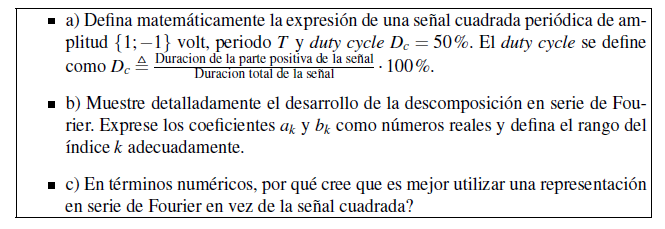

Las series de Fourier son empleadas para analizar funciones periódicas a través de la descomposición de una función en una suma infinita de funciones senoidales mucho más simples (como combinación de senos y cosenos con frecuencias enteras).

La función matemática que define la serie de Fourier se expresa como: 

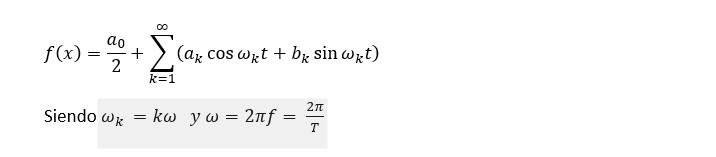





Si bien el limite de k es infinito en la teoría, en la práctica dependera del límite de la herramienta que usemos para calcular la sumatoria.
Los valores de los coeficientes de Fourier (a0,an y bn) se pueden hallar de la siguiente manera:



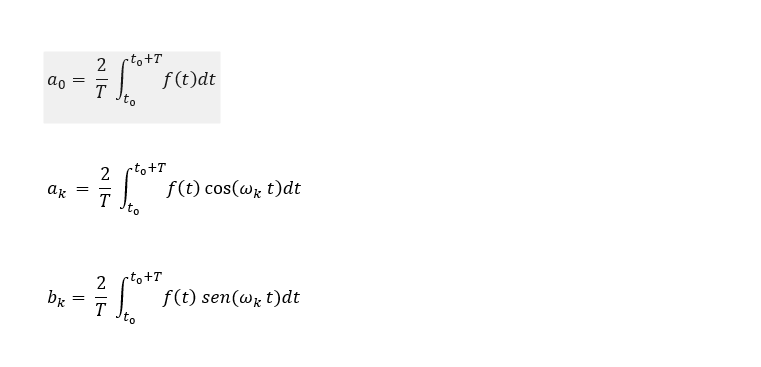




Para este trabajo, la función que debemos analizar es una señal cuadrada de periodo T con un ciclo del 50%. Eso implica que para la mitad de la funcion tenemos el valor maximo de la amplitud y para la otra mitad el valor minimo.



El hecho de que sea una onda periódica facilita el cálculo reduciendolo al analisis de lo que pasa en un período.


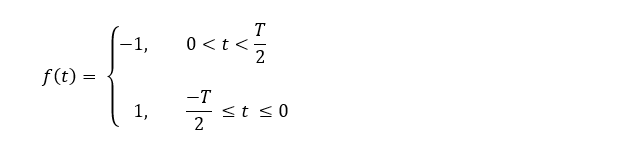

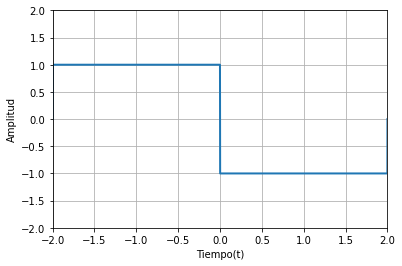

In [ ]:
import numpy as np
import matplotlib.pylab as plt

#AMPLITUD 
amplitud = 1
#PERIODO 
T = 4

t = np.arange(-T, 3*T, 0.001)
def y(T):
    return np.heaviside(t + T/2,1) + -2 * np.heaviside(t, 1) + np.heaviside(t-T/2,2)

plt.plot(t, y(T), lw=2)
plt.grid()
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(t)')
plt.ylim(-2,2)
plt.xlim(-T/2,T/2)
plt.show()


Quedando entonces las fórmulas de los coeficientes de la siguiente manera: 

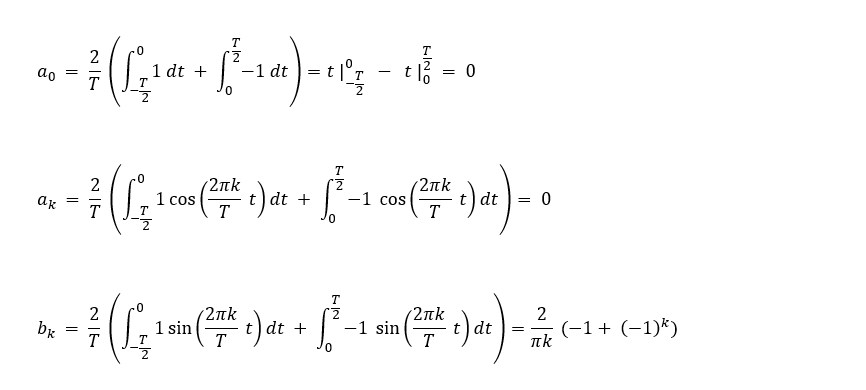


La utilidad de preferir usar una aproximación usando series de Fourier a la señal cuadrada se puede deber a la facilidad con la que se la puede analizar a
estas funciones que estan compuestas de combinaciones lineales de senos y cosenos. Esto hace que sea derivable e integrable en todo punto ya que asi lo
son las funciones trigonometricas, a diferencia de la señal cuadrada original, que presenta discontinuidades en ciertos puntos. Como resultado, la serie de Fourier
resultante es facilmente computable y analizable numéricamente.

# **2. Determinacion de coeficientes de Fourier por ajuste de funciones**

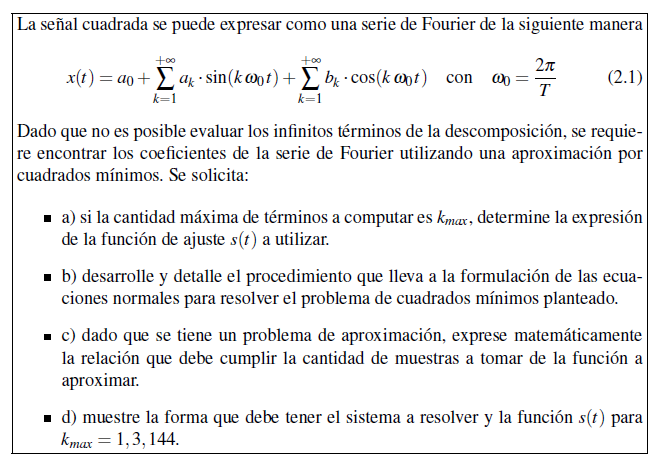

El ejemplo mas sencillo de una aproximación por cuadrados mínimos es ajustar una línea recta cuya expresion matematica es    

> y = a0 + a1 x + e

donde e es el error o diferencia entre el valor verdadero de ***y*** y el modelo.

Reordenando la ecuación:
> e = y - (a0 + a1x) 

Una estrategia para ajustar una "mejor" línea a traves de los datos será minimizar la suma de los cuadrados de los errores residuales entre la y medida y la y del modelo lineal


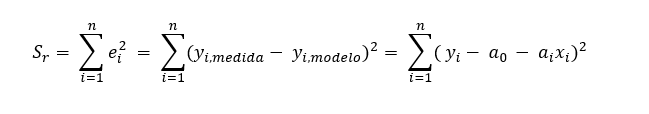

donde n es el número total de puntos.

Las regresiones de tipo lineal simple, polinomial y lineal múltiples pertenecen a un modelo lineal general de cuadrados mínimos: 

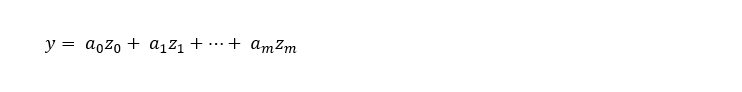

donde los z_m son m+1 funciones diferentes.
El término "lineal" se refiere sólo a la dependencia del modelo sobre sus parámetros (es decir, los a_m), por lo que las funciones z_m pueden llegar a ser altamente no lineales, tal es el caso de las z senoidales.


Mientras tanto este planteo puede expresarse de manera matricial como 

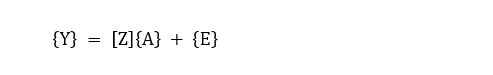

donde [Z] es una matriz de los valores calculados de las funciones z_i evaluadas en las mediciones de las variables independientes.

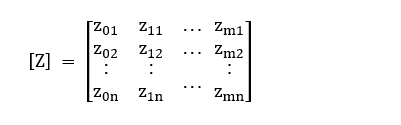

siendo m es la cantidad de variables del modelo y n el número de datos

El vector columna {Y} contiene los valores observados de la variable dependiente

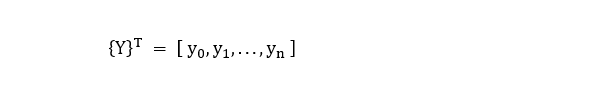

El vector columna {A} contiene los coeficientes desconocidos 

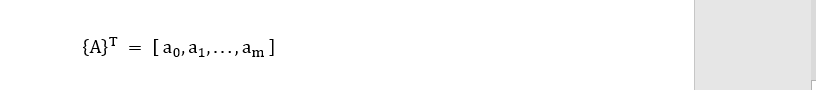

y el vector columna {E} contiene los residuos 

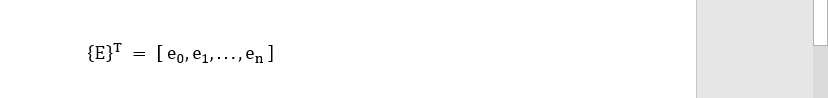

La suma de los cuadrados de los residuos en este modelo se definen como 

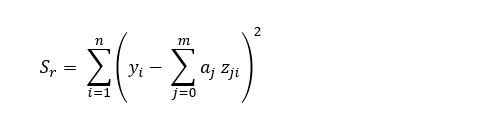


Esta cantidad se minimiza tomando las derivadas parciales con respecto a cada uno de los coeficientes e igualando a cero la ecuacion resultante. El resultado de este proceso son las ecuaciones normales, que se expresan en forma matricial como 

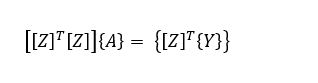

El método de cuadrados mínimos se utiliza para resolver problemas del tipo A.x = b, con lo visto anteriormente sabemos que **x** es una matriz de (#coeficientes)x1 y **b una matriz de (#muestras)x1** , entonces nuestra matriz A debe ser de (#muestras)x(#coeficientes) para que el sistema pueda resolverse. Pero, además debe haber al menos tantas muestras como coeficientes a hallar, de otra manera tendriamos mas incognitas que ecuaciones. 
Como estamos tratando con un problema de aproximación, la cantidad de muestras deber ser un poco mayor al numero de coeficientes para poder diferenciarlo de un problema de interpolación

Volviendo a nuestro problema, primero vamos a suponer que el término a_0 es igual a cero para que los coeficientes a_i y b_i tengan las mismas dimensiones.

Luego hacemos el analisis para k=1, asi: 

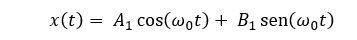

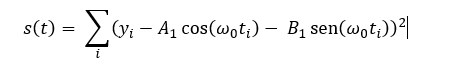

Para determinar los valores de A1 y B1 se deriva con respecto a cada uno de los coeficientes. Al igual estas derivadas a cero, se dará como resultado un S mínimo

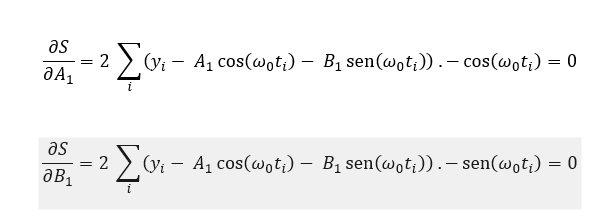

Nos quedan dos ecuaciones simultaneas con dos incognitas (A1 y B1). Las cuales hemos dicho anteriormente que se denominan ecuaciones normales

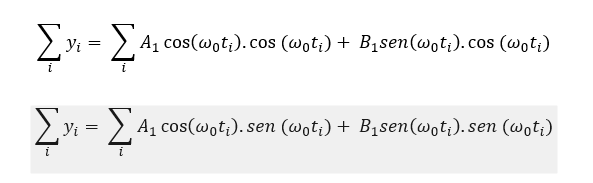

Las ecuaciones normales para hallar los coeficientes que minimicen la funcion se expresan en forma matricial como 

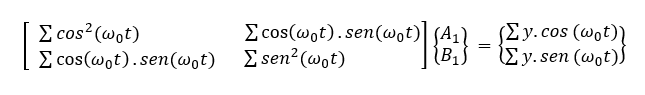

Un detalle a tener en cuenta es que la sumatoria de un producto de funciones es el producto interno entre ambas funciones. 

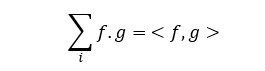

De esta manera podemos simplificar la notación.

Todo el análisis anterior se puede extender a un modelo general para k>1 dando como resultado:





La función de ajuste general:
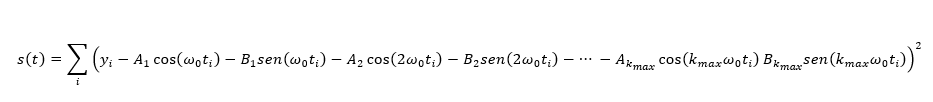

El sistema general: 
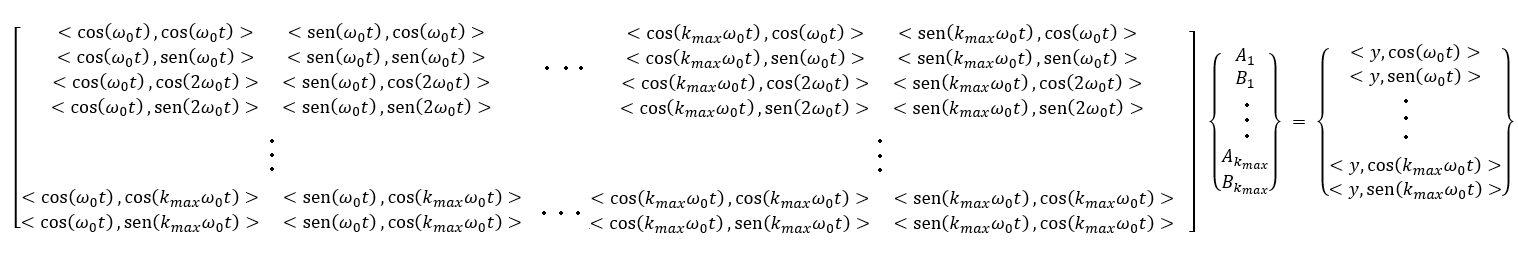

En particular

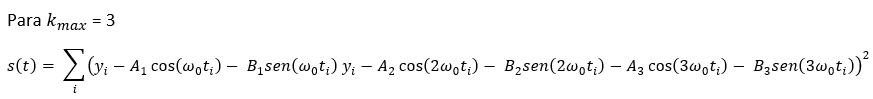



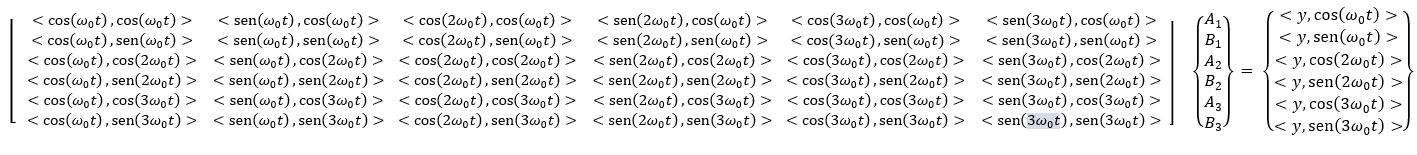

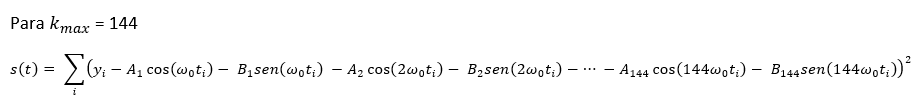

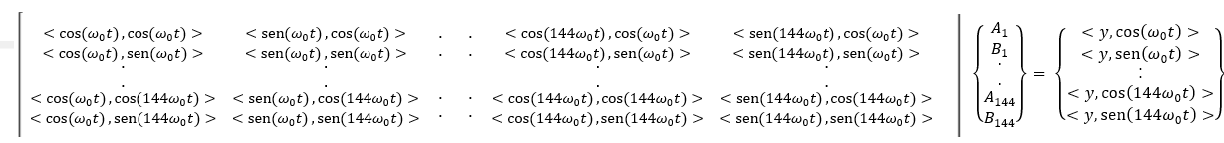

# **Cálculo del sistema con las muestras**

Para el desarrollo de los puntos 3. y 4. del trabajo vamos a utilizar la misma matriz de muestras 

In [ ]:
import numpy as np

#Periodo [ms]
T=1

#Cantidad de muestras
muestras = 432

#Valores de kmax utilizados en el tp
kmaxs = [1,3,13,34,55,144]

#Vector de muestras de tiempo, genera #muestras en el intervalo (-T/2,T/2)
t = np.linspace(-T/2,T/2,muestras)

#Frecuencia
wo = (2*(np.pi))/T

#Funcion cuadrada
def y(t):
    return np.heaviside(t + T/2,1) + -2 * np.heaviside(t, 1) + np.heaviside(t-T/2,2)

#Creacion del sistema a través de las muestras
def sistema(kmax):
    
    muestras = 432
    t = np.linspace(-T/2,T/2,muestras)
    A = np.empty((muestras,2*kmax))
    b = np.empty((muestras))

    #Calculamos las matrices A y b
    for m in range(muestras):
        j=1
        for i in range(0,2*kmax,2):

            A[m][i] = np.sin(j*wo*t[m])
            A[m][i+1] = np.cos(j*wo*t[m])
            j +=1
      
    for l in range(muestras):
        b[l] = y(t[l])     
    
    return A,b 

# Triangulacion normal
def triangular(A, I):

    (rows,cols) = A.shape
    #rows = cols

    for i in range(cols - 1):
        for j in range (i+1, rows):
            multiplicador = A[j][i] / A[i][i]
            A[j,:] = A[j,:] - (multiplicador * A[i,:])
            I[j,:] = I[j,:] - (multiplicador * I[i,:])

    return A,I


def transpuesta(A):

    (rows,cols) = A.shape
    M = np.zeros((cols, rows))
    for i in range(cols):
        M[i,:] = A[:, i]

    return M


#Funcion de inversion de la matriz
def invertir(A):
    (rows,cols) = A.shape
    #rows = cols
    I = np.identity(rows)

    A, I = triangular(A,I)
    A = transpuesta(A)
    I = transpuesta(I)
    A, I = triangular(A, I)
    A = transpuesta(A)
    I = transpuesta(I)

    for i in range(rows):
        I[i,:] = I[i,:] / A[i][i]
        A[i,:] = A[i,:] / A[i][i]

    return I


A1, b1 = sistema(1)
A3, b3 = sistema(3)
A13, b13 = sistema(13)
A34, b34 = sistema(34)
A55, b55 = sistema(55)
A144, b144 = sistema(144)



# **3. Resolución mediante eliminación gaussiana con pivoteo parcial**

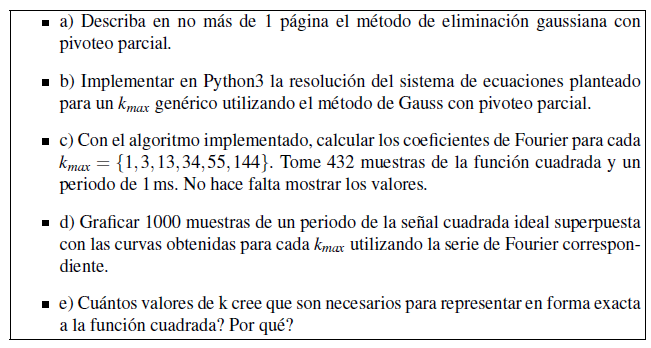

Los métodos que están basados en la factorización de matrices reemplazan la matriz de coeficientes A por dos matrices triangulares cuyo producto es igual a ella. Es decir dada la matriz A de orden nxn, hallamos una matriz L triangular inferior y una matriz U triangular superior tal que A = L.U

La eliminación gaussiana se aplica para resolver sistemas lineales de la forma Ax = b. Este método consiste en escalonar la matriz aumentada del sistema, operando sobre la misma, para obtener un sistema equivalente en el que cada ecuación tiene una incógnita menos que la anterior, con la salvedad de que si el primer coeficiente de la primer columna es cero, se debe intercambiar la fila por una fila inferior que no tenga cero en esa posición.

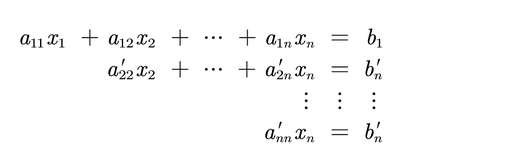


El pivoteo parcial propone que a medida que hagamos la triangulación gaussiana intercambiemos filas (de ser necesario) para poder obtener valores lo más pequeños posibles para los multiplicadores, reduciendo así el error de redondeo.

Se debe utilizar una matriz de permutación P, la cual se obtiene de la sucesión de intercambio de filas a partir de una matriz identidad, para que se conserven las relaciones entre las matrices, es decir, existe P tal que P.A admite uan factorización como un producto de dos matrices triangulares.

P.A = L.U

En cada etapa **i** se busca el mayor de los elementos de la columna **i**, si dicho elemento no se encuentra en la posicion aii, se realiza el intercambio de filas.



In [ ]:
import numpy as np
 
coeficientescg = []

#Matriz de permutacion correspondiente a "UN" cambio de fila
def permutar (fila1,fila2,n):
    Identidad = np.identity(n)
    Matriz_P = np.identity(n)
    
    Matriz_P[fila1] = Identidad[fila2]
    Matriz_P[fila2] = Identidad[fila1]
       
    return Matriz_P 

def pivoteo_parcial(A):
    #Copia de la matriz para no sobreescribir la original
    A_modificada = np.copy(A)

    #Pivote parcial 
    dimension = np.shape(A_modificada)
    filas =  dimension[0]
    columnas = dimension[1]
    L = np.identity(columnas)
    P = np.identity(columnas)

    cambios = 0
    for i in range(0,filas-1,1):
        #todas las filas pero solo la columna i , se selecciona las filas de la diagnoal en adelante
        columna = abs(A_modificada[i:,i])
   
        #donde se encuentra el mayor valor
        maxpos = np.argmax(columna)
           
        if (maxpos+i != i): #Si el maximo no esta en la primera posicion se intercambia la fila, i = fila de trabajo
            #Cambio de la fila
            aux = np.copy(A_modificada[i,:])
            A_modificada[i,:] = A_modificada[maxpos + i,:]
            A_modificada[maxpos + i,:] = aux
            
            #Se asigna/se multiplican las matrices de permutacion  
            Paux = permutar(i,maxpos+i,filas)
            if cambios==0:
                P = Paux
                cambios =1
            else:
                P = (Paux @ P)
            
            if  i !=0: #Si hay un cambio de fila al comienzo no afecta a L, cambia para los pivoteos posteriores
                aux2 = np.copy(L[i,i-1])
                L[i,i-1] = L[maxpos + i,i-1]
                L[maxpos+i,i-1] = aux2    
                   
        #se triangula la matriz y se asignan los multiplicadores a la matriz L
        for r in range(i+1,columnas):
            multiplicador = (A_modificada[r,i]/A_modificada[i,i])
            L[r,i] = multiplicador
            A_modificada[r] = A_modificada[r] - multiplicador*A_modificada[i] 
    
    return A_modificada, L, P     

#Para Kmax = 1
U1, L1,P1 = pivoteo_parcial(transpuesta(A1) @ A1)
b1_mod = P1 @ (transpuesta(A1) @ b1)
Y1 = invertir(L1) @ b1_mod
X1 = invertir(U1) @ Y1
coeficientescg.append(X1)

#Para Kmax = 3
U3, L3,P3 = pivoteo_parcial(transpuesta(A3) @ A3)
b3_mod = P3 @ (transpuesta(A3) @ b3)
Y3 = invertir(L3) @ b3_mod
X3 = invertir(U3) @ Y3
coeficientescg.append(X3)

#Para Kmax = 13
U13, L13,P13 = pivoteo_parcial(transpuesta(A13) @ A13)
b13_mod = P13 @ (transpuesta(A13) @ b1)
Y13 = invertir(L13) @ b13_mod
X13 = invertir(U13) @ Y13
coeficientescg.append(X13)

#Para Kmax = 34
U34, L34,P34 = pivoteo_parcial(transpuesta(A34) @ A34)
b34_mod = P34 @ (transpuesta(A34) @ b1)
Y34 = invertir(L34) @ b34_mod
X34 = invertir(U34) @ Y34
coeficientescg.append(X34)

#Para Kmax = 55
U55, L55,P55 = pivoteo_parcial(transpuesta(A55) @ A55)
b55_mod = P55 @ (transpuesta(A55) @ b1)
Y55 = invertir(L55) @ b55_mod
X55 = invertir(U55) @ Y55
coeficientescg.append(X55)

#Para Kmax =144
U144, L144,P144 = pivoteo_parcial(transpuesta(A144) @ A144)
b144_mod = P144 @ (transpuesta(A144) @ b1)
Y144 = invertir(L144) @ b144_mod
X144 = invertir(U144) @ Y144
coeficientescg.append(X144)



**Gráfico de los resultados de pivoteo parcial** 

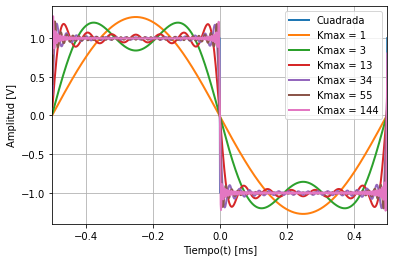

In [ ]:
import matplotlib.pylab as plt
#Periodo[ms]
T=1
#Muestras para el gráfico 
muestras = 1000
wo = (2*(np.pi))/T
t = np.linspace(-T/2,T/2,muestras)

#Calculo de la sumatoria de fourier para cierto t
def fourier(t1,coeficientes):
    f= 0
    j = 1
    for i in range(0,coeficientes.size, 2):
        f += coeficientes[i] * np.sin(j * t1 * wo) + coeficientes[i + 1] * np.cos(j *t1 * wo)
        j += 1

    return f

# Funcion de Fourier para todas las t de muestras para cada Kmax
f1 = fourier(t, coeficientescg[0])
f3 = fourier(t, coeficientescg[1])
f13 = fourier(t, coeficientescg[2])
f34 = fourier(t, coeficientescg[3])
f55 = fourier(t, coeficientescg[4])
f144 = fourier(t, coeficientescg[5])

#Grafico
plt.plot(t, y(t), label= "Cuadrada", lw=2)
plt.plot(t, f1, label= "Kmax = 1", lw=2)
plt.plot(t, f3, label= "Kmax = 3",lw=2)
plt.plot(t, f13, label= "Kmax = 13", lw=2)
plt.plot(t, f34, label= "Kmax = 34", lw=2)
plt.plot(t, f55, label= "Kmax = 55",lw=2)
plt.plot(t, f144, label ="Kmax = 144", lw=2)
plt.legend()
plt.grid()
plt.ylabel('Amplitud [V]')
plt.xlabel('Tiempo(t) [ms]')
plt.xlim(-T/2,T/2)
plt.show()


e) Cumpliendo con las condiciones del teorema de Dirichlet, podemos asegurarnos que la expansion en serie de fourier va a converger a la funcion cuadrada donde es continua, y al promedio de los limites por derecha y por izquierda en los puntos donde es discontinua. Esto quiere decir que con mayor Kmax va a ser mas exacto y la energia del error va a terminar siendo 0.

# **4) Resolución mediante el método iterativo de Gauss-Seidel**

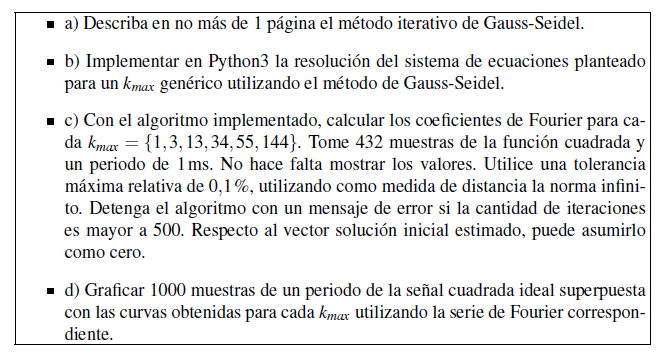

El método de Gauss-Seidel resuelve el sistema lineal Ax = b comenzando con una aproximacion inicial y generando una sucesión de vectores que converge a la solución del sistema.

Se convierte el sistema Ax = b en Tx^k + c = x^(k+1) y arrancando con un x^0 se despeja el primer componente de x^(k+1). Luego para despejar el segundo componente, en vez de usar el primer componente de x^0 (como en el metodo de Jacobi) se usa el que encontramos en el paso anterior. Y asi sucesivamente hasta despejar todos los componentes de x^(k+1). Este proceso se puede repetir hasta llegar a una solucion con un margen de error tan chico como se quiera.

Matematicamente lo podemos escribir como:

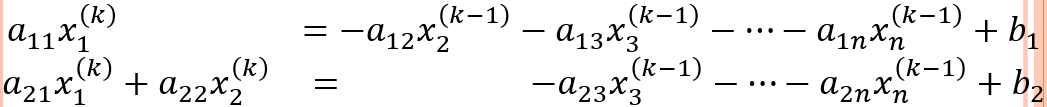

y asi sucesivamente con cada ecuacion. 

Siguiendo esta notacion, llegamos a:

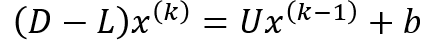

Luego pasando dividiendo el (D - L) y haciendo que

Tg = (D-L)^-1 * U 

y cg = (D-L)^-1 * b. 

Llegamos a que:

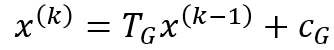

In [ ]:
import numpy as np
import math
from numpy.linalg import inv


def diagonal(A):

    (rows, cols) = A.shape
    M = np.zeros((rows,cols))
    for i in range(rows):
        M[i][i] = A[i][i] 

    return M


def triangInferior(A):

    (rows,cols) = A.shape
    M = np.copy(A)
    
    for i in range(rows):
        for j in range(i + 1, cols):
            M[i][j] = 0

    return M


def triangSuperior(A):

    (rows,cols) = A.shape
    M = np.copy(A)
    
    for i in range(rows):
        for j in range(0, i):
            M[i][j] = 0

    return M


def verificarDescomposicion(A,D,L,U):
    if np.allclose(A,D-L-U) is True:
      print("Descomposicion correcta")
    else:
        print("Descomposicion incorrecta")


def sacar_T_y_c(A,b):
  
    A_nueva = transpuesta(A) @ A

    D = diagonal(A_nueva)
    L = D - triangInferior(A_nueva)
    U = D - triangSuperior(A_nueva)
   
    #verificarDescomposicion(A_nueva,D,L,U)

    M = invertir(D - L)
    T = M @ (U)
    c = M @ (transpuesta(A) @ b)

    return T, c


def norma_infinito(T):

    (rows, cols) = T.shape
    sums = np.zeros(rows)

    for r in range(rows):
        for c in range(cols):
            sums[r] += np.abs(T[r,c])

    return np.max(sums)


def Gauss_seidel(A, b, x0, Nmax):

    T, c = sacar_T_y_c(A,b)
    x = np.zeros((x0.size, Nmax + 1))
    x[:, 0] = x0

    error = np.zeros(Nmax+1)
    error[0] = np.nan

    nInfT = norma_infinito(T)

    for N in range(Nmax):
        x[:, N+1] = T @ x[:, N] + c
        if (not math.isclose(np.linalg.norm(x[:,N+1]), 0, abs_tol = 1e-15)):
            error[N + 1] = np.linalg.norm((x[:,N+1] - x[:,N]) / np.linalg.norm(x[:,N+1]))
            if error[N+1] < 0.001:
                return x, error, N+1, T, nInfT
        else:
            print("Denominador se anula")
            error[N + 1] = np.nan
            return x, error, N+1, T, nInfT
  
    print("Se ha superado a la cantidad maxima de iteraciones")
    return x, error,N+1, T, nInfT


def imprimir_historia(x, error, max):

    
    print( "|  N  |                     x                   |    error    |")
    print("---------------------------------------------------------------")
    for N in range(max +1):
        print( " N = " + str(N) + "\t     "+ np.array2string(x[:, N], formatter={'float_kind': lambda x: "%.5f" % x}) + "\t     "+ np.array2string(error[N], formatter={'float_kind': lambda x: "%.5f" % x}))
      

Nmax = 500

#Con kmax = 1
x0 = np.zeros(2)
x1, error, iteraciones1, T1, nInfT1 = Gauss_seidel(A1, b1, x0, Nmax)

#Con kmax = 3
x0 = np.zeros(6)
x3, error, iteraciones3, T3, nInfT3= Gauss_seidel(A3, b3, x0, Nmax)

#Con kmax = 13
x0 = np.zeros(26)
x13, error, iteraciones13, T13, nInfT13 = Gauss_seidel(A13, b13, x0, Nmax)

#Con kmax = 34
x0 = np.zeros(68)
x34, error, iteraciones34, T34, nInfT34 = Gauss_seidel(A34, b34, x0, Nmax)

#Con kmax = 55
x0 = np.zeros(110)
x55, error, iteraciones55, T55, nInfT55 = Gauss_seidel(A55, b55, x0, Nmax)

#Con kmax = 144
x0 = np.zeros(288)
x144, error, iteraciones144, T144, nInfT144 = Gauss_seidel(A144, b144, x0, Nmax)

coeficientescgs = []      
coeficientescgs.append(x1[:,iteraciones1])
coeficientescgs.append(x3[:,iteraciones3])
coeficientescgs.append(x13[:,iteraciones13])
coeficientescgs.append(x34[:,iteraciones34])
coeficientescgs.append(x55[:,iteraciones55])
coeficientescgs.append(x144[:,iteraciones144])


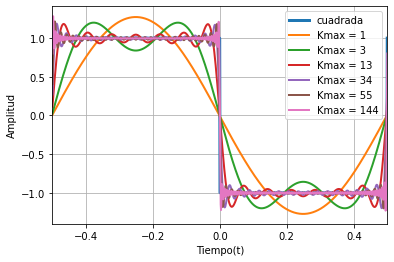

In [ ]:
import matplotlib.pylab as plt
T=1
muestras = 1000
wo = (2*(np.pi))/T
t = np.linspace(-T/2,T/2,muestras)


def fourier(t1,coeficientes):
    f= 0
    j = 1
    for i in range(0,coeficientes.size, 2):
        f += coeficientes[i] * np.sin(j * t1 * wo) + coeficientes[i + 1] * np.cos(j *t1 * wo)
        j += 1

    return f

f1 = fourier(t, x1[:,iteraciones1])
f3 = fourier(t, x3[:,iteraciones3])
f13 = fourier(t, x13[:,iteraciones13])
f34 = fourier(t, x34[:,iteraciones34])
f55 = fourier(t, x55[:,iteraciones55])
f144 = fourier(t, x144[:,iteraciones144])


plt.plot(t, y(t), label = "cuadrada",lw=3)
plt.plot(t, f1, label = "Kmax = 1", lw=2)
plt.plot(t, f3, label = "Kmax = 3", lw=2)
plt.plot(t, f13, label = "Kmax = 13", lw=2)
plt.plot(t, f34, label = "Kmax = 34", lw=2)
plt.plot(t, f55, label = "Kmax = 55", lw=2)
plt.plot(t, f144, label = "Kmax = 144",lw=2)
plt.legend()
plt.grid()
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(t)')
plt.xlim(-T/2,T/2)
plt.show()


# **5) Comparación entre métodos de solución utilizados.**

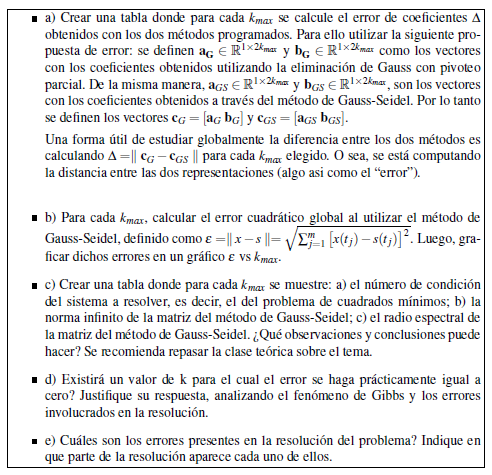

a)

In [ ]:
coeficientes_gs = [x1[:,iteraciones1], x3[:,iteraciones3], x13[:,iteraciones13], x34[:,iteraciones34], x55[:,iteraciones55], x144[:,iteraciones144]]
 
def calcular_c(kmax, coeficientes):

  c = np.zeros((kmax,2))

  for i in range(0, kmax, 1):

    for j in range(0, 2, 1):
      c[i][j] = coeficientes[2*i+j]

  return c

print("______________________ DIFERENCIA ENTRE METODOS________________________\n ")

print("k = 1  error= ", norma_infinito(calcular_c(1, coeficientescg[0]) - calcular_c(1, coeficientes_gs[0])))
print("------------------------------------------------------------------ ")
print("k = 3  error= ",norma_infinito(calcular_c(3, coeficientescg[1]) - calcular_c(3, coeficientes_gs[1])))
print("------------------------------------------------------------------ ")
print("k = 13  error= ",norma_infinito(calcular_c(13, coeficientescg[2]) - calcular_c(13, coeficientes_gs[2])))
print("------------------------------------------------------------------ ")
print("k = 34  error= ",norma_infinito(calcular_c(34, coeficientescg[3]) - calcular_c(34, coeficientes_gs[3])))
print("------------------------------------------------------------------ ")
print("k = 55  error= ",norma_infinito(calcular_c(55, coeficientescg[4]) - calcular_c(55, coeficientes_gs[4])))
print("------------------------------------------------------------------ ")
print("k = 144  error= ",norma_infinito(calcular_c(144, coeficientescg[5]) - calcular_c(144, coeficientes_gs[5])))



______________________ DIFERENCIA ENTRE METODOS________________________
 
k = 1  error=  1.734723475976807e-18
------------------------------------------------------------------ 
k = 3  error=  1.9347417855308802e-07
------------------------------------------------------------------ 
k = 13  error=  1.1838659666734558e-05
------------------------------------------------------------------ 
k = 34  error=  2.634844986691351e-06
------------------------------------------------------------------ 
k = 55  error=  9.348409496546216e-06
------------------------------------------------------------------ 
k = 144  error=  7.067675256160427e-06


b)


In [ ]:
muestras = 1000
t = np.linspace(-T/2,T/2,muestras)
suma = 0

def calcular_error(f):

  suma = 0
  for i in range(muestras):
    suma += pow((f[i] - y(t[i])),2)
  error = math.sqrt(suma)
  return error

ks = [1,3,13,34,55,144]
fs = [f1, f3, f13, f34, f55, f144]

errores= np.zeros((6, 2))

for i in range(len(ks)):
  errores[i][0] = ks[i]
  errores[i][1] = calcular_error(fs[i])

print(errores)


[[  1.          13.79304881]
 [  3.          10.01434079]
 [ 13.           5.4713384 ]
 [ 34.           3.60605529]
 [ 55.           2.88274708]
 [144.           1.90533206]]


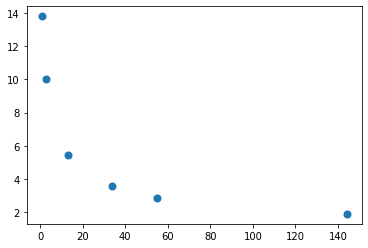

In [ ]:
plt.scatter(errores[:,0], errores[:,1],lw = 2)
plt.show()

c)

In [ ]:

nInfinitos = [nInfT1, nInfT3, nInfT13, nInfT34, nInfT55, nInfT144]

radios_T = [max(abs(np.linalg.eig(T1)[0])), max(abs(np.linalg.eig(T3)[0])), max(abs(np.linalg.eig(T13)[0])), max(abs(np.linalg.eig(T34)[0])), max(abs(np.linalg.eig(T55)[0])), max(abs(np.linalg.eig(T144)[0]))]

j=0
for k in kmaxs:
  print(" para Kmax =",k, "  Norma infinito de T: ",nInfinitos[j], "    Radio espectral de T: ", radios_T[j])
  print("------------------------------------------------------------------------------------------------ ")
  j +=1

 para Kmax = 1   Norma infinito de T:  3.902825954913713e-17     Radio espectral de T:  1.516169454319641e-33
------------------------------------------------------------------------------------------------ 
 para Kmax = 3   Norma infinito de T:  0.00923787528868351     Radio espectral de T:  0.0003139157810764614
------------------------------------------------------------------------------------------------ 
 para Kmax = 13   Norma infinito de T:  0.05542725173210041     Radio espectral de T:  0.008017813796000138
------------------------------------------------------------------------------------------------ 
 para Kmax = 34   Norma infinito de T:  0.15242494226327555     Radio espectral de T:  0.028092493354220517
------------------------------------------------------------------------------------------------ 
 para Kmax = 55   Norma infinito de T:  0.24942263279445098     Radio espectral de T:  0.049638457637682425
------------------------------------------------------------------

De acuerdo a la teórica, el radio espectral de una matriz siempre es menor o igual a cualquier norma natural de la misma matriz. En nuestro caso usamos la norma infinito, y se cumple esa condición para todos los k calculados.

d) No existe un valor de K para el cual el error se haga practicamente cero ya que esto indicaria que la funcion original y la aproximación por series de Fourier serán practicamente iguales. 

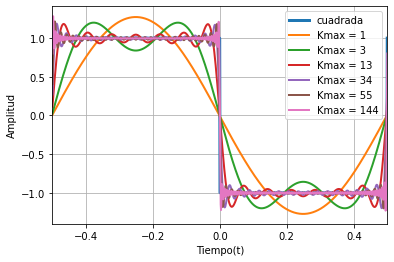




Viendo los graficos conseguidos en puntos anteriores vemos que a mayor Kmax elegido, se presentan en los puntos de discontinuidad unos "picos" que tienen cada vez mas distancia respecto a la funcion original, a ambos lados de la discontinuidad. A esto se lo conoce como fenómeno de Gibbs. Los picos se hacen cada vez mas puntiagudos a medida que aumentamos nuestro K max, y se determina que la magnitud de ese pico converge a aproximadamente el 18% de la magnitud del salto de discontinuidad. Por lo que es importante tener en cuenta esta diferencia en estos puntos si queremos tener una medida más exacta de los valores de la señal cuadrada usando las series de Fourier. 

e) Hay un error de truncamiento ya que no podemos representar una serie de fourier con infinitos coeficientes ak y bk, siempre hay que elegir un k maximo y por ende siempre va a haber un error.

Tambien hay un error generado por las limitaciones de la computadora ya que la CPU tiene una cierta precision a la hora de hacer cuentas y calcular los coeficientes